In [13]:
import pyforest
import pycountry_convert as pc
import warnings

In [14]:
warnings.simplefilter('ignore')

In [16]:
data = pd.read_excel('whi-2019.xlsx')

<IPython.core.display.Javascript object>

In [17]:
data.drop(columns="Overall rank", inplace=True)

In [18]:
data

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [19]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [20]:
data['Continent'] = 'cont'

In [21]:
data['Country or region'].loc[38] = 'Trinidad and Tobago'
data['Country or region'].loc[102] = 'Congo'
data['Country or region'].loc[109] = 'Palestine'
data['Country or region'].loc[126] = 'Democratic Republic of the Congo'

In [22]:
for i in range(data.shape[0]):
    if data['Country or region'].iloc[i] == 'Kosovo':
        data['Continent'].iloc[i] = 'Europe'
    else:
        data['Continent'].iloc[i] = country_to_continent(data['Country or region'].iloc[i])

In [23]:
data.dtypes

Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Continent                        object
dtype: object

In [24]:
data['Continent'].value_counts()

Asia             46
Africa           45
Europe           40
North America    13
South America    10
Oceania           2
Name: Continent, dtype: int64

In [25]:
list_a = [['Africa', round(data.loc[data['Continent'] == 'Africa', 'Score'].mean(),3)],
          ['Asia', round(data.loc[data['Continent'] == 'Asia', 'Score'].mean(),3)],
          ['Europe', round(data.loc[data['Continent'] == 'Europe', 'Score'].mean(),3)],
          ['North America', round(data.loc[data['Continent'] == 'North America', 'Score'].mean(),3)],
          ['Oceania', round(data.loc[data['Continent'] == 'Oceania', 'Score'].mean(),3)],
          ['South America', round(data.loc[data['Continent'] == 'South America', 'Score'].mean(),3)]
]

In [26]:
data_continent = pd.DataFrame(list_a, columns = ['Continent', 'Score'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

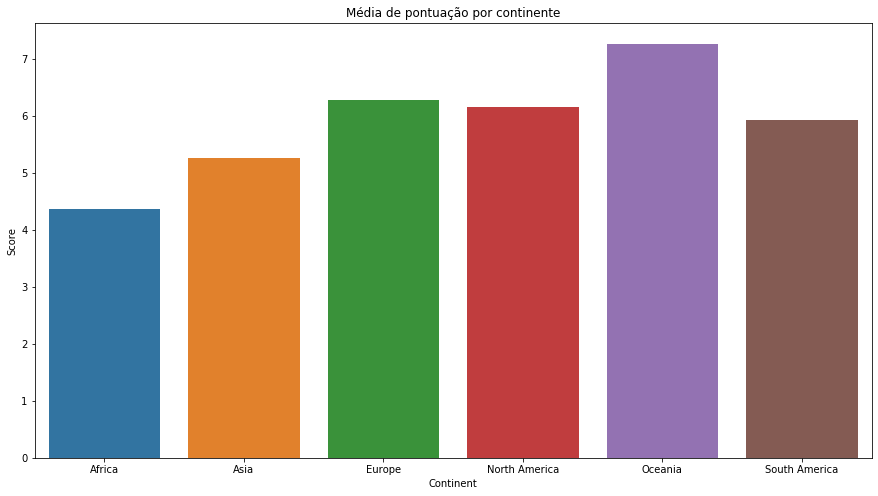

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x = data_continent['Continent'], y = data_continent['Score']).set_title("Média de pontuação por continente");

In [28]:
data.loc[data['Continent'] == 'Africa', 'Score'].mean()

4.368288888888889

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

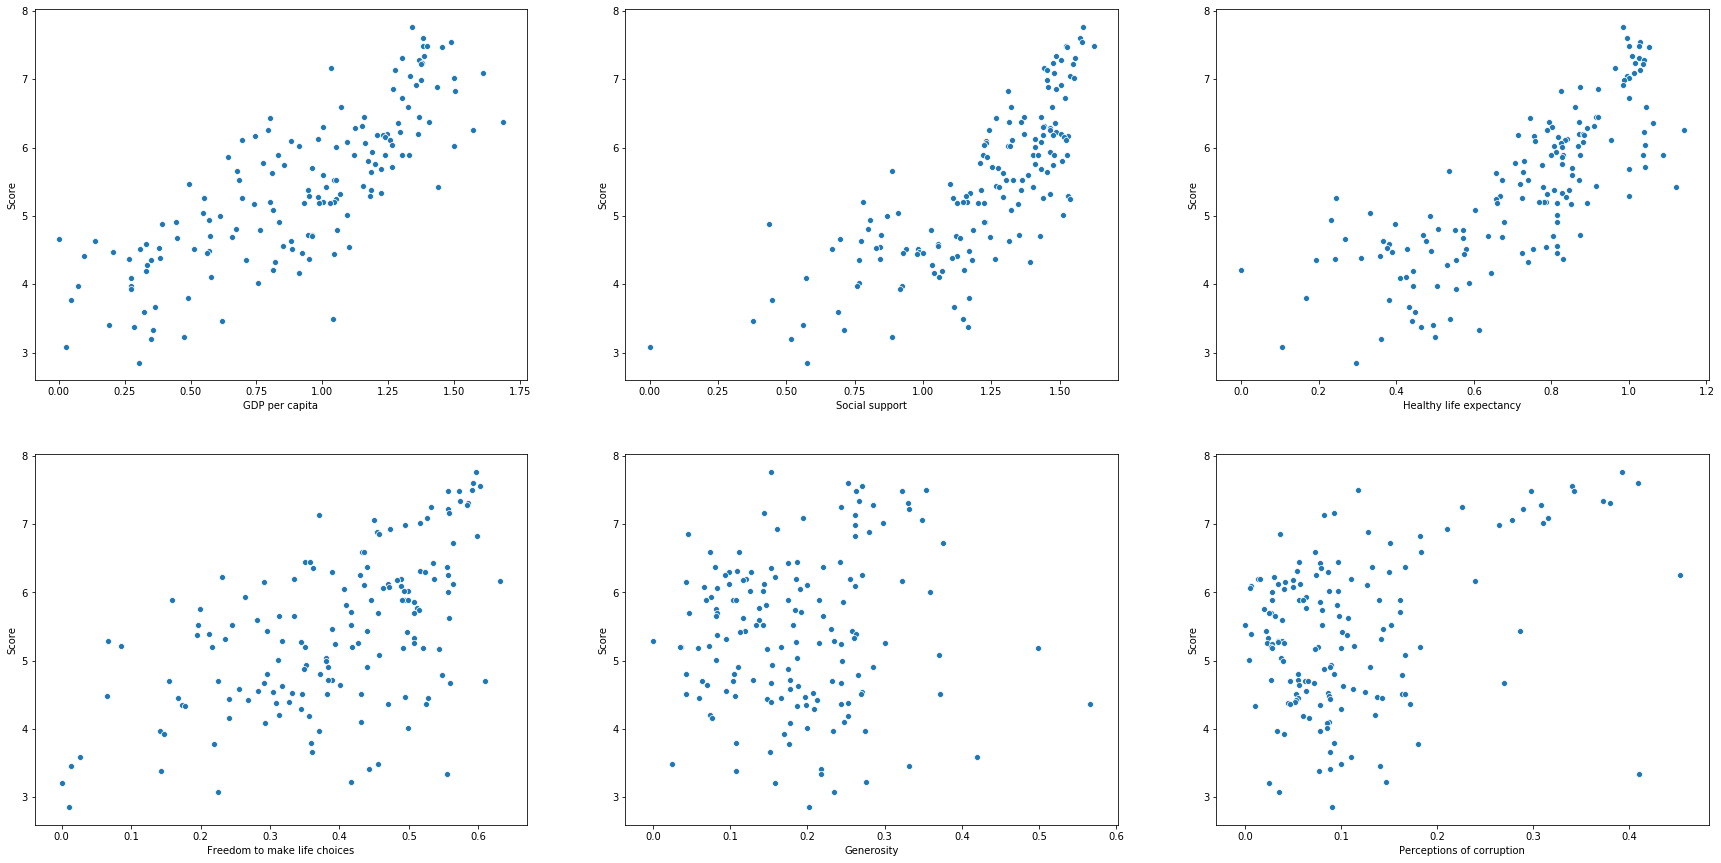

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
sns.scatterplot(data=data, x='GDP per capita', y='Score', ax=ax[0][0]);
sns.scatterplot(data=data, x='Social support', y='Score', ax=ax[0][1]);
sns.scatterplot(data=data, x='Healthy life expectancy', y='Score', ax=ax[0][2]);
sns.scatterplot(data=data, x='Freedom to make life choices', y='Score', ax=ax[1][0]);
sns.scatterplot(data=data, x='Generosity', y='Score', ax=ax[1][1]);
sns.scatterplot(data=data, x='Perceptions of corruption', y='Score', ax=ax[1][2]);

In [30]:
data.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

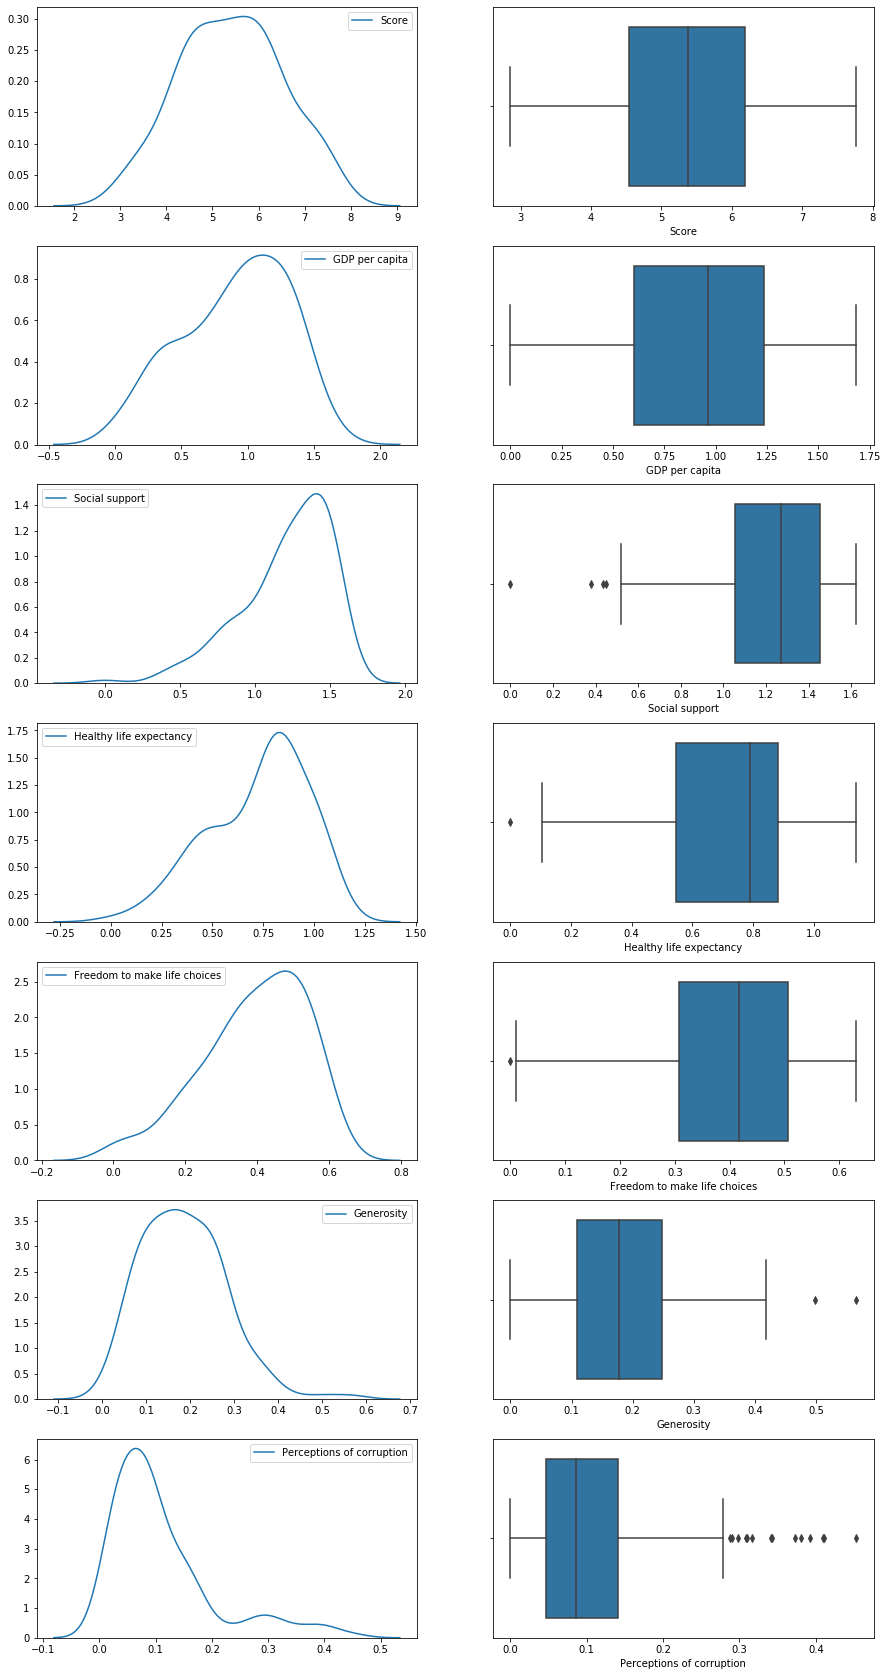

In [31]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))

sns.kdeplot(data.Score,ax=ax[0][0]);
sns.boxplot(x=data['Score'], ax=ax[0][1]);

sns.kdeplot(data['GDP per capita'],ax=ax[1][0]);
sns.boxplot(x=data['GDP per capita'], ax=ax[1][1]);

sns.kdeplot(data['Social support'],ax=ax[2][0]);
sns.boxplot(x=data['Social support'], ax=ax[2][1]);

sns.kdeplot(data['Healthy life expectancy'],ax=ax[3][0]);
sns.boxplot(x=data['Healthy life expectancy'], ax=ax[3][1]);

sns.kdeplot(data['Freedom to make life choices'],ax=ax[4][0]);
sns.boxplot(x=data['Freedom to make life choices'], ax=ax[4][1]);

sns.kdeplot(data['Generosity'],ax=ax[5][0]);
sns.boxplot(x=data['Generosity'], ax=ax[5][1]);

sns.kdeplot(data['Perceptions of corruption'],ax=ax[6][0]);
sns.boxplot(x=data['Perceptions of corruption'], ax=ax[6][1]);



In [32]:
    stats = data.describe()
    stats.loc['IQR'] = stats.loc['75%'] - stats.loc['25%'] # appending interquartile range instead of recalculating it
    stats = stats.append(data.reindex(stats.columns, axis=1).agg(['skew', 'mad', 'kurt']))
    stats


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000
IQR,1.640000,0.629750,0.396750,0.334000,0.199250,0.139500,0.094250
skew,0.011450,-0.385232,-1.134728,-0.613841,-0.685636,0.745942,1.650410


In [33]:
corrmat = data.corr()
top_corr_features = corrmat.index

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

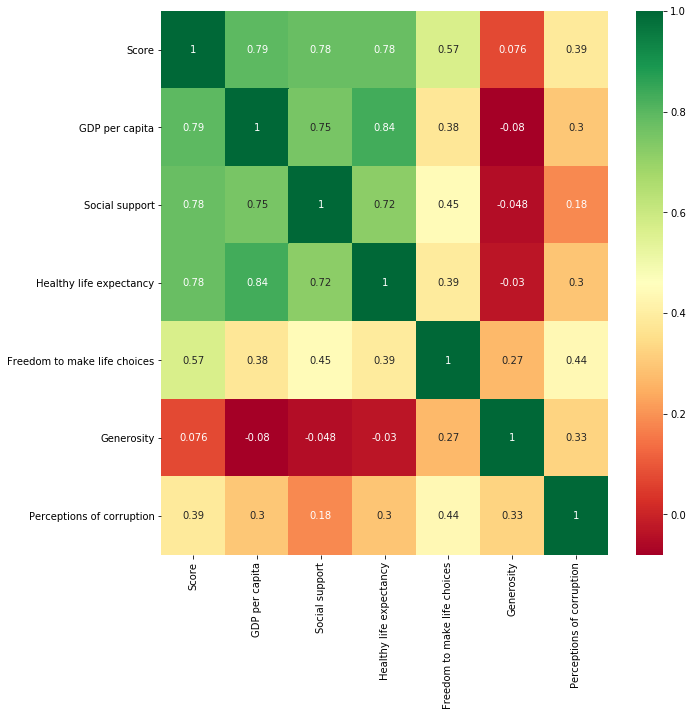

In [34]:
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

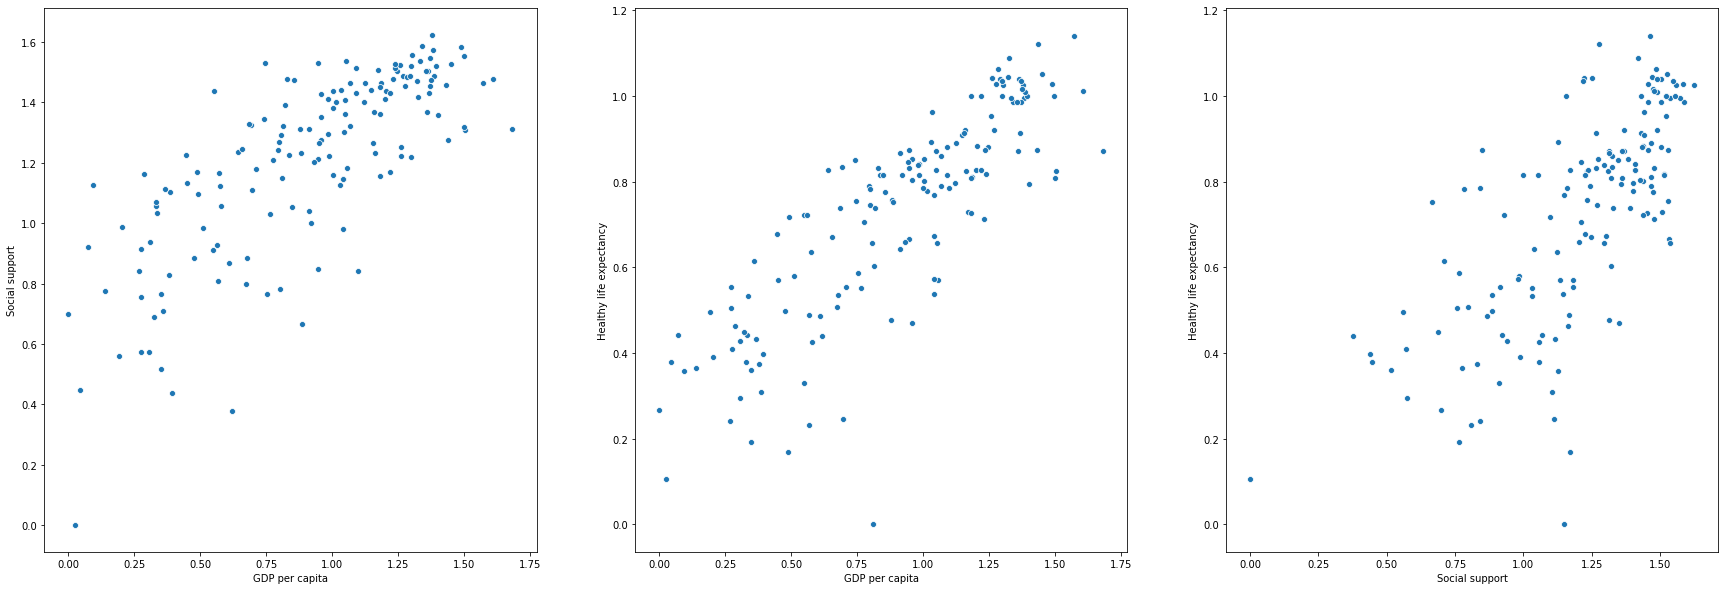

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sns.scatterplot(data=data, x='GDP per capita', y='Social support', ax=ax[0]);
sns.scatterplot(data=data, x='GDP per capita', y='Healthy life expectancy', ax=ax[1]);
sns.scatterplot(data=data, x='Social support', y='Healthy life expectancy', ax=ax[2]);


In [36]:
from sklearn.decomposition import PCA
data_pca = data.drop(columns=["Country or region", 'Continent'])

In [37]:
pca = PCA(n_components=7)
pca.fit(data_pca)

z = pca.transform(data_pca)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

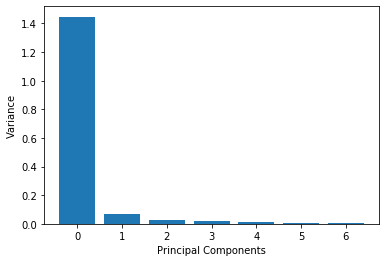

In [38]:
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_);

plt.xticks(features);
plt.xlabel("Principal Components");
plt.ylabel("Variance");

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
data_pca_norm = data.drop(columns=["Country or region", 'Continent'])
data_pca_norm = StandardScaler().fit_transform(data_pca_norm)

In [41]:
pca_norm = PCA(n_components=7)
pca_norm.fit(data_pca_norm)

v = pca_norm.transform(data_pca_norm)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

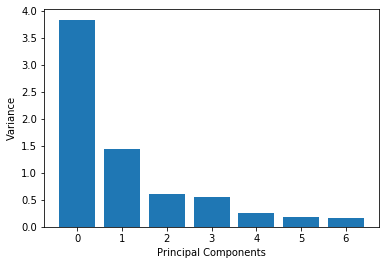

In [42]:
features_norm = range(pca_norm.n_components_)

plt.bar(features_norm, pca_norm.explained_variance_);

plt.xticks(features_norm);
plt.xlabel("Principal Components");
plt.ylabel("Variance");

In [43]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']])
print('KMO score: {}'.format(kmo_model))



KMO score: 0.8346809389586665
